# NeuroFlow Data Science Assessment - Part I

In [40]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = "darkgrid")
sns.set(rc={'figure.figsize':(12,10)})

## Data Preprossing

In [2]:
df = pd.read_csv('phq_all_final.csv')
df.head()

,date,patient_id,type,patient_date_created,score
0,2019-08-26T13:32:43.019162,8430,gad7,2019-06-03T13:23:02.63568,6
1,2019-11-15T17:55:11.364877,8430,gad7,2019-06-03T13:23:02.63568,1
2,2019-10-07T18:23:29.611351,14338,gad7,2019-06-03T13:32:30.66846,10
3,2019-11-04T20:16:28.610965,14338,gad7,2019-06-03T13:32:30.66846,7
4,2019-12-02T20:56:55.966354,14338,gad7,2019-06-03T13:32:30.66846,9


In [3]:
df.shape

(53698, 5)

In [4]:
df.isnull().describe()

,date,patient_id,type,patient_date_created,score
count,53698,53698,53698,53698,53698
unique,1,1,1,1,1
top,False,False,False,False,False
freq,53698,53698,53698,53698,53698


In [5]:
df['patient_id'].nunique()

15502

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['patient_date_created'] = pd.to_datetime(df['patient_date_created'])

# extract year
exam_year = df[['date']].apply(lambda x: dt.datetime.strftime(x['date'], '%Y'), axis=1)
create_year = df[['patient_date_created']].apply(lambda x: dt.datetime.strftime(x['patient_date_created'], '%Y'), axis=1)

# extract month
exam_month = df[['date']].apply(lambda x: dt.datetime.strftime(x['date'], '%B'), axis=1)
create_month = df[['patient_date_created']].apply(lambda x: dt.datetime.strftime(x['patient_date_created'], '%B'), axis=1)

# extract day of the week
exam_weekday = df[['date']].apply(lambda x: dt.datetime.strftime(x['date'], '%A'), axis=1)
create_weekday = df[['patient_date_created']].apply(lambda x: dt.datetime.strftime(x['patient_date_created'], '%A'), axis=1)

# extract time of the day
exam_time = df[['date']].apply(lambda x: int(dt.datetime.strftime(x['date'], '%H')), axis=1)
create_time = df[['patient_date_created']].apply(lambda x: int(dt.datetime.strftime(x['patient_date_created'], '%H')), axis=1)

df['exam_year'] = exam_year
df['create_year'] = create_year
df['exam_month'] = exam_month
df['create_month'] = create_month
df['exam_weekday'] = exam_weekday
df['create_weekday'] = create_weekday
df['exam_time'] = exam_time
df['create_time'] = create_time

In [7]:
df.drop(['date', 'patient_date_created'], inplace=True, axis=1)
df.head()

,patient_id,type,score,exam_year,create_year,exam_month,create_month,exam_weekday,create_weekday,exam_time,create_time
0,8430,gad7,6,2019,2019,August,June,Monday,Monday,13,13
1,8430,gad7,1,2019,2019,November,June,Friday,Monday,17,13
2,14338,gad7,10,2019,2019,October,June,Monday,Monday,18,13
3,14338,gad7,7,2019,2019,November,June,Monday,Monday,20,13
4,14338,gad7,9,2019,2019,December,June,Monday,Monday,20,13


In [8]:
# group severity
bins = [0, 5, 10, 15, 21]
labels = ['low', 'mild', 'moderate', 'severe']
df['severity'] = pd.cut(df['score'], bins=bins, labels=labels, include_lowest=True).astype('str')
df.head()

,patient_id,type,score,exam_year,create_year,exam_month,create_month,exam_weekday,create_weekday,exam_time,create_time,severity
0,8430,gad7,6,2019,2019,August,June,Monday,Monday,13,13,mild
1,8430,gad7,1,2019,2019,November,June,Friday,Monday,17,13,low
2,14338,gad7,10,2019,2019,October,June,Monday,Monday,18,13,mild
3,14338,gad7,7,2019,2019,November,June,Monday,Monday,20,13,mild
4,14338,gad7,9,2019,2019,December,June,Monday,Monday,20,13,mild


In [9]:
# need further clinical evaluation
bins = [0, 9, 21]
labels = [0, 1] # 0=No, 1=Yes
df['clinical_evaluation'] = pd.cut(df['score'], bins=bins, labels=labels, include_lowest=True).astype(int)
df.head()

,patient_id,type,score,exam_year,create_year,exam_month,create_month,exam_weekday,create_weekday,exam_time,create_time,severity,clinical_evaluation
0,8430,gad7,6,2019,2019,August,June,Monday,Monday,13,13,mild,0
1,8430,gad7,1,2019,2019,November,June,Friday,Monday,17,13,low,0
2,14338,gad7,10,2019,2019,October,June,Monday,Monday,18,13,mild,1
3,14338,gad7,7,2019,2019,November,June,Monday,Monday,20,13,mild,0
4,14338,gad7,9,2019,2019,December,June,Monday,Monday,20,13,mild,0


In [10]:
df.drop('type', inplace=True, axis=1)

In [11]:
df.head()

,patient_id,score,exam_year,create_year,exam_month,create_month,exam_weekday,create_weekday,exam_time,create_time,severity,clinical_evaluation
0,8430,6,2019,2019,August,June,Monday,Monday,13,13,mild,0
1,8430,1,2019,2019,November,June,Friday,Monday,17,13,low,0
2,14338,10,2019,2019,October,June,Monday,Monday,18,13,mild,1
3,14338,7,2019,2019,November,June,Monday,Monday,20,13,mild,0
4,14338,9,2019,2019,December,June,Monday,Monday,20,13,mild,0


### Summary for the Section:
1. There are 53698 rows in the dataset with no missing values. 
2. There are 15502 unique patients in the dataset.  
3. I converted both exam_date and create_date columns to separate columns contains the year, month, day of the week, and time of the day. Therefore, we can use the information.  
4. Based on the spec, I add column indicating the severity and further clinical evaluation into the dataset.  

## Assumptions
1. The paitent_id is unique.  
2. Every patient responded honestly to each question.  
3. Every patient did this test in a typical normal day of their life (not just after a claming or consulting session with therapist).  

## Exploratory Analysis

### Score Distribution

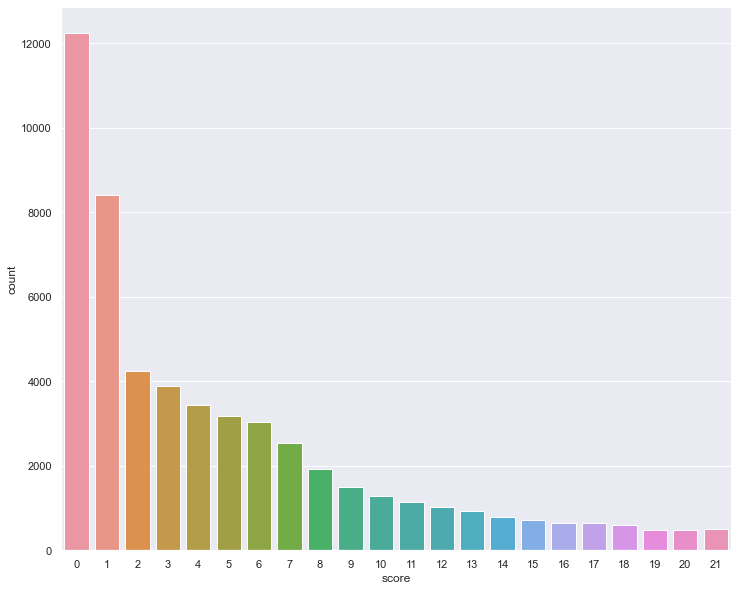

In [41]:
sns.countplot('score', data=df)
plt.show()

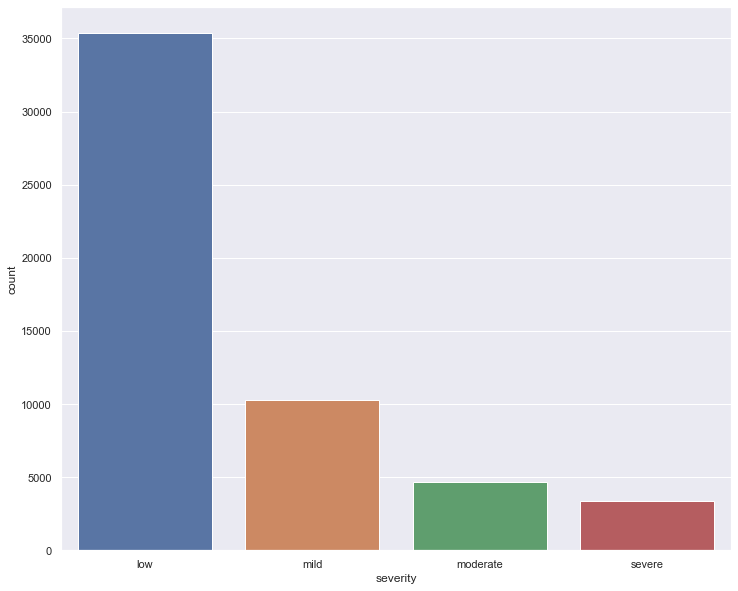

In [42]:
sns.countplot('severity', data=df, order=['low', 'mild', 'moderate', 'severe'])
plt.show()

In [32]:
print('Percentage of Each Level:')
print(df['severity'].value_counts(normalize=True)*100)

Percentage of Each Level:
low         65.927968
mild        19.134791
moderate     8.661403
severe       6.275839
Name: severity, dtype: float64


#### Insights:
1. In the dataset, most of the test results turn to be low to minimum score. There are 6% diagnoses are severe.  

### Relationship Between Month of the Test and Further Clinical Evaluation

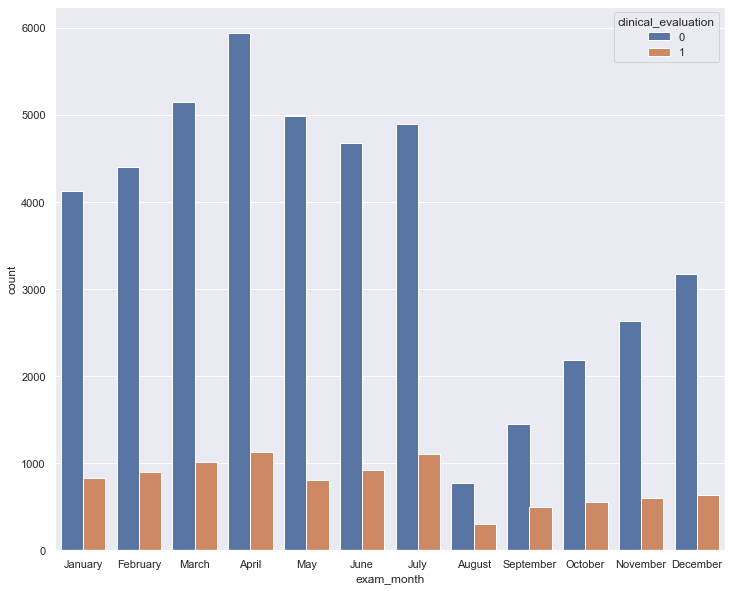

In [43]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot('exam_month', hue='clinical_evaluation', data=df, order=order)
plt.show()

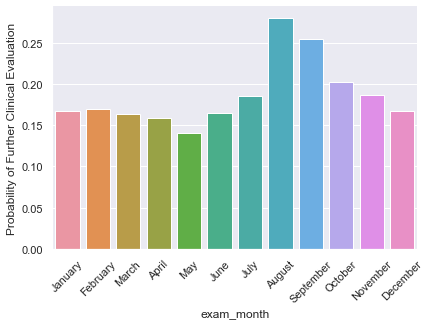

In [37]:
sns.catplot(x='exam_month', y='clinical_evaluation', data=df,
            kind='bar', order=order, ci=None, aspect=1.5, height=4)
plt.ylabel('Probability of Further Clinical Evaluation')
plt.xticks(rotation=45)
plt.show()

#### Insights:
1. We can see that in August, the least amount of people did the test. However, there has a greater probability that anyone took the test around that time need further clinical evaluation.  
2. We can also see that there is a linear increase trends in the number of people taking the test. I would assume that this might be the website is trying to lauch the test or product to the system. Therefore, there will be a trend of increase.  


### Relationship Between the Day of Week and Further Clinical Evaluation

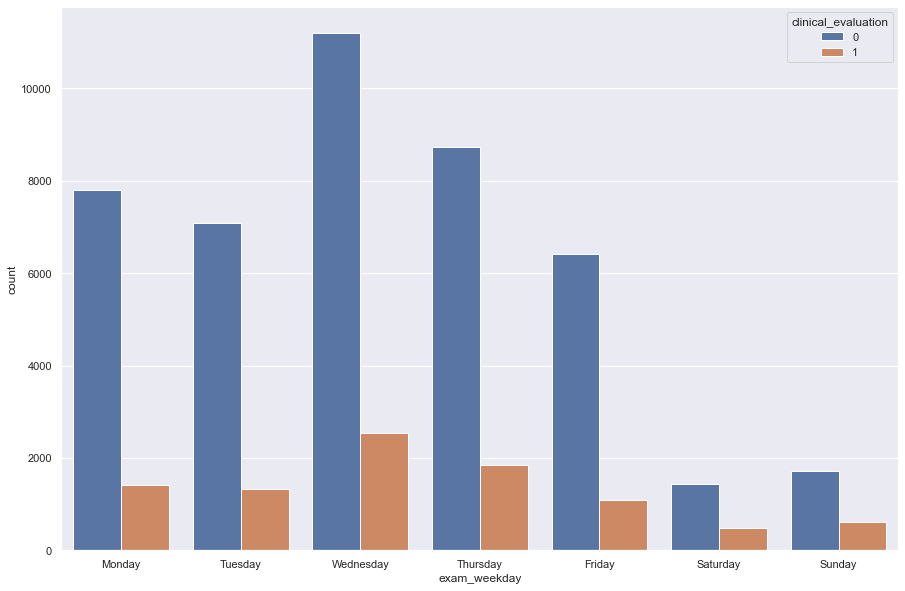

In [39]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot('exam_weekday', hue='clinical_evaluation', data=df, order=order)
plt.show()

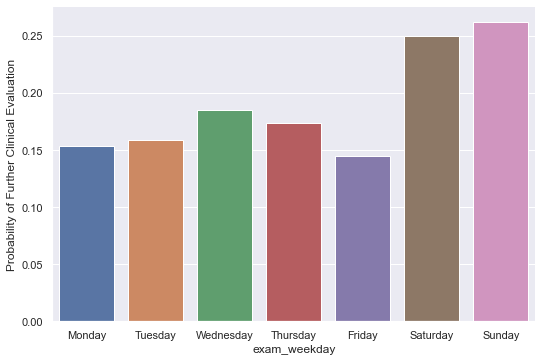

In [17]:
sns.catplot(x='exam_weekday', y='clinical_evaluation', data=df,
           kind='bar', aspect=1.5, ci=None, order=order)
plt.ylabel('Probability of Further Clinical Evaluation')
plt.show()

#### Insights:
1. We can see that the number of people taking test on the weekend is significantly less than that of people taking on weekday. However, the probability of further clinical evaluation is greater on weekend than on weekdays.  

### Relationship Between Time of the Day and Further Clinical Evaluation

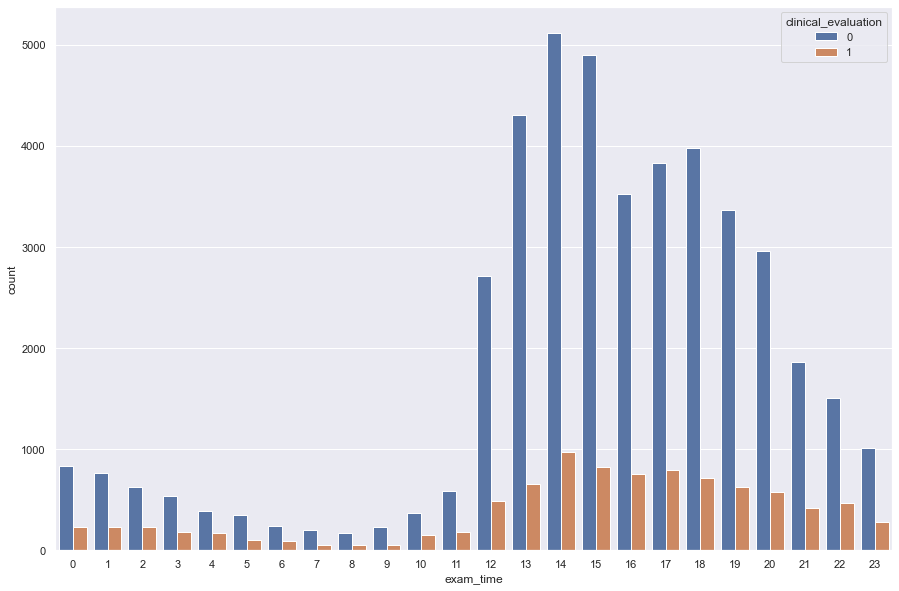

In [20]:
order = np.arange(24)
sns.countplot('exam_time', hue='clinical_evaluation', data=df, order=order)
plt.show()

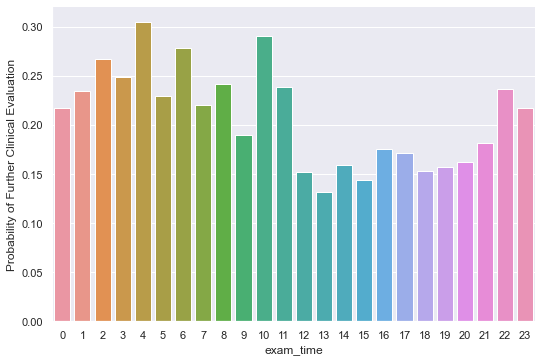

In [22]:
sns.catplot(x='exam_time', y='clinical_evaluation', data=df, kind='bar',
           aspect=1.5, ci=None, order=order)
plt.ylabel('Probability of Further Clinical Evaluation')
plt.show()

#### Insights:
1. We could see that most of people took the test in the afternoon (after 12pm). However, the probability of needing further evaluation is greater in general in the first half of the day.  
2. People taking in the first half of the day might have some sleeping disorder along with the GAD. This might make sense for midnight test cases. Since they are anxious and they can't fall asleep. However, we can see that early morning's probability is also higher than afternoon's. Therefore, there might be some connection between time of taking the test and the result. 

## Recommendations for Further Data Collection
1. It would be good to have some information such as gender, ethnicity, age, city or state, marital status, employement, and income etc.  
2. It would be good to track the therapy engagement of patients. For example, if this test is perform generally once per month, then we should track how many session they have with their care providers.  

## Suggestions for Further Investigation or Reasearch
Since I saw a interesting pattern between the day of week and the result and between the time of the day and the result, I would suggest to do more investigation on that. If it is proven to be significant, we might want to set a certain taking test day for each patient once a month. Also, we might need to ask them to take the test twice (morning and afternoon) to get a more accurate result.  